In [2]:
import numpy as np
import scipy as sp
from scipy import stats as sp_stats
from matplotlib import pyplot as plt
%matplotlib inline

import random as rnd
import os
import math

# required for interactive plotting
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import numpy.polynomial as np_poly

from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

from pprint import pprint
import functools as ft

from graphviz import Digraph

DIR_HOME = os.environ['HOME']
DIR_REPOS = DIR_HOME + "/neo-human/repos"
DIR_BMLSP = DIR_REPOS + "/luispedro/BuildingMachineLearningSystemsWithPython"

initialization
$
\newcommand{\Brace}[1]{\left\{#1\right\}}
\newcommand{\Bracket}[1]{\left[#1\right]}
\newcommand{\cases}[1]{\begin{cases}#1\end{cases}}
\newcommand{\cov}[1]{\text{cov} \sigma\left[#1\right]}
\newcommand{\diff}[2]{\frac{d #1}{d #2}}
\newcommand{\difftwo}[2]{\frac{d^2 #1}{d {#2}^2}}
\newcommand{\diffn}[2]{{#1}^{\prime}(#2)}
\newcommand{\ds}{\displaystyle}
\newcommand{\E}[1]{\mathbb{E}\left[ #1 \right]}
\newcommand{\expb}[1]{\exp\left\{#1\right\}} 
\newcommand{\EXP}[1]{\exp\left\{#1\right\}} 
\newcommand{\frachalf}[1]{\frac{#1}{2}~}
\newcommand{\fracone}[1]{\frac{1}{#1}~}
\newcommand{\fracrec}[1]{\frac{1}{#1}~}
\newcommand{\half}{\fracone{2}}
\newcommand{\H}[1]{\mathbb{H}\left[#1\right]}
\newcommand{\Int}[2]{\displaystyle \int_{#1}^{#2}~}
\newcommand{\intinfinf}{\Int{-\infty}{\infty}}
\newcommand{\inv}[1]{#1^{-1}}
\newcommand{\invp}[1]{\left({#1}\right)^{-1}}
\newcommand{\KL}[2]{\text{KL}\left(#1 \Vert #2\right)}
\newcommand{\Lim}[1]{\displaystyle \lim_{#1}}
\newcommand{\Ln}[1]{\ln \left\(#1\right\)}
\newcommand{\Lnb}[1]{\ln \left\{#1\right\} }
\newcommand{\Mod}[1]{\left|#1\right|}
\newcommand{\Norm}[1]{\left\lVert #1 \right\rVert}
\newcommand{\Normsqr}[1]{\Norm{#1}^2}
\newcommand{\map}[1]{#1_{\text{MAP}}}
\newcommand{\ml}[1]{#1_{\text{ML}}}
\newcommand{\MI}[1]{\mathcal{I}\left(#1\right)}
\newcommand{\P}{\mathbb{P}}
\newcommand{\Paran}[1]{\left(#1\right)}
\newcommand{\Partial}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\sqrbrkt}[1]{\Bracket{#1}^2}
\newcommand{\sqrbrc}[1]{\Brace{#1}^2}
\newcommand{\trace}[1]{\text{Tr}\left( #1 \right)}
\newcommand{\traceb}[1]{\text{Tr}\left\{#1\right\}}
\newcommand{\underl}[1]{\text{$\underline{#1}$}}
\newcommand{\V}[1]{\mathbb{V}\left[#1\right]}
$
$
\DeclareMathOperator*{\argmin}{arg\,min}
\DeclareMathOperator*{\argmax}{arg\,max}
$
$
\newcommand{\mat}[1]{ \left[ \begin{matrix} #1 \end{matrix} \right] }
\newcommand{\matp}[1]{ \left( \begin{matrix} #1 \end{matrix} \right)}
\newcommand{\mats}[1]{ \begin{matrix}#1\end{matrix} }
\newcommand{\arrthree}[1]{
\begin{array}{rlr} #1 \end{array}}
$

$
\newcommand{\C}{\mathbb{C}}
\newcommand{\Ca}{\mathcal{C}}
\newcommand{\Caone}{\Ca_1}
\newcommand{\Catwo}{\Ca_2}
\newcommand{\Cak}{\Ca_k}
\newcommand{\D}{\mathcal{D}}
\newcommand{\G}{\mathcal{G}}
\newcommand{\I}{\mathcal{I}}
\newcommand{\L}{\mathcal{L}}
\newcommand{\M}{\mathcal{M}}
\newcommand{\N}{\mathbb{N}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\Ra}{\mathcal{R}}
$
$
\newcommand{\commentgray}[1]{\color{gray}{\text{#1}}}
$

sum, product
$
\newcommand{\sumi}{\displaystyle \sum_i}
\newcommand{\sumiD}{\displaystyle \sum_{i=1}^{D}}
\newcommand{\sumiL}{\displaystyle \sum_{i=1}^{L}}
\newcommand{\sumiN}{\displaystyle \sum_{i=1}^{N}}
\newcommand{\sumjD}{\displaystyle \sum_{j=1}^{D}}
\newcommand{\sumjK}{\displaystyle \sum_{j=1}^{K}}
\newcommand{\sumjMl}{\sum_{j=1}^{M-1}}
\newcommand{\sumkK}{\displaystyle \sum_{k=1}^{K}}
\newcommand{\sumkM}{\displaystyle \sum_{k=1}^{M}}
\newcommand{\sumkMl}{\sum_{k=1}^{M-1}}
\newcommand{\sumkp}{\displaystyle \sum_{k=1}^{p}}
\newcommand{\summN}{\displaystyle \sum_{m=1}^{N}}
\newcommand{\sumnN}{\displaystyle \sum_{n=1}^{N}}
$
$
\newcommand{\prodi}{\displaystyle \prod_i}
\newcommand{\prodiD}{\displaystyle \prod_{i=1}^{D}}
\newcommand{\prodiL}{\displaystyle \prod_{i=1}^{L}}
\newcommand{\prodiN}{\displaystyle \prod_{i=1}^{N}}
\newcommand{\prodjK}{\displaystyle \prod_{j=1}^{K}}
\newcommand{\prodkK}{\displaystyle \prod_{k=1}^{K}}
\newcommand{\prodmN}{\displaystyle \prod_{m=1}^{N}}
\newcommand{\prodnN}{\displaystyle \prod_{n=1}^{N}}
$

alphabet shortcuts
$
\newcommand{\ab}{\mathbf{a}}
\newcommand{\at}{\ab^T}
\newcommand{\Ab}{\mathbf{A}}
\newcommand{\At}{\Ab^T}
\newcommand{\Ai}{\inv{\Ab}}
\newcommand{\Abjk}{\Ab_{jk}}
\newcommand{\bb}{\mathbf{b}}
\newcommand{\bt}{\bb^T}
\newcommand{\Bb}{\mathbf{B}}
\newcommand{\Bt}{\Bb^T}
\newcommand{\Cb}{\mathbf{C}}
\newcommand{\Cn}{\Cb_{N}}
\newcommand{\Db}{\mathbf{D}}
\newcommand{\fb}{\mathbf{f}}
\newcommand{\fp}{f^{\prime}}
\newcommand{\Hb}{\mathbf{H}}
\newcommand{\hx}{h(\xb)}
\newcommand{\Jb}{\mathbf{J}}
\newcommand{\kb}{\mathbf{k}}
\newcommand{\kt}{\kb^T}
\newcommand{\Kb}{\mathbf{K}}
\newcommand{\Lb}{\mathbf{L}}
\newcommand{\Lt}{\Lb^T}
\newcommand{\Lbi}{\Lb^{-1}}
\newcommand{\mb}{\mathbf{m}}
\newcommand{\mt}{\mb^T}
\newcommand{\mbn}{\mb_N}
\newcommand{\mbnt}{\mbn^T}
\newcommand{\mbN}{\mb_N}
\newcommand{\mbNt}{\mbn^T}
\newcommand{\Mb}{\mathbf{M}}
\newcommand{\Qb}{\mathbf{Q}}
\newcommand{\Rb}{\mathbf{R}}
\newcommand{\sb}{\mathbf{s}}
\newcommand{\Sb}{\mathbf{S}}
\newcommand{\tb}{\mathbf{t}}
\newcommand{\tbnn}{\tb_{N}}
\newcommand{\tbnp}{\tb_{N+1}}
\newcommand{\tt}{\tb^T}
\newcommand{\Tb}{\mathbf{T}}
\newcommand{\Tt}{\Tb^T}
\newcommand{\ub}{\mathbf{u}}
\newcommand{\Ub}{\mathbf{U}}
\newcommand{\Ut}{\Ub^T}
\newcommand{\vb}{\mathbf{v}}
\newcommand{\Vb}{\mathbf{V}}
\newcommand{\wb}{\mathbf{w}}
\newcommand{\wnr}[1]{\wb^{(\text{#1})}}
\newcommand{\wt}{\wb^T}
\newcommand{\Wb}{\mathbf{W}}
\newcommand{\Wt}{\Wb^T}
\newcommand{\Wtilde}{\widetilde{\Wb}}
\newcommand{\Wtildet}{\Wtilde^T}
\newcommand{\Xb}{\mathbf{X}}
\newcommand{\Xt}{\Xb^T}
\newcommand{\Xk}{\Xb_k}
\newcommand{\Xkt}{\Xk^T}
\newcommand{\Xtilde}{\widetilde{\Xb}}
\newcommand{\Xtildet}{\Xtilde^T}
\newcommand{\xb}{\mathbf{x}}
\newcommand{\xt}{\xb^T}
\newcommand{\xtilde}{\widetilde{\xb}}
\newcommand{\xtilden}{\xtilde_n}
\newcommand{\xtildent}{\xtilden^T}
\newcommand{\xp}{x^{\prime}}
\newcommand{\xbp}{\xb^{\prime}}
\newcommand{\xbm}{\xb_m}
\newcommand{\xbn}{\xb_n}
\newcommand{\xbnp}{\xb_{N+1}}
\newcommand{\xab}{\mathbf{x_a}}
\newcommand{\xabt}{\mathbf{x_a}^T}
\newcommand{\xbb}{\mathbf{x_b}}
\newcommand{\xbbt}{\mathbf{x_b}^T}
\newcommand{\yb}{\mathbf{y}}
\newcommand{\yt}{\yb^T}
\newcommand{\yx}{y(\xb)}
\newcommand{\Yb}{\mathbf{Y}}
\newcommand{\Yt}{\Yb^T}
\newcommand{\zb}{\mathbf{z}}
\newcommand{\zt}{\zb^T}
\newcommand{\zbm}{\zb_m}
\newcommand{\zbn}{\zb_n}
\newcommand{\zbnp}{\zb_{n-1}}
\newcommand{\znk}{\zb_{nk}}
\newcommand{\znpj}{\zb_{n-1,j}}
\newcommand{\Zb}{\mathbf{Z}}
$

math shortcuts
$
\newcommand{\alphab}{\pmb{\alpha}}
\newcommand{\alphabt}{\alphab^T}
\newcommand{\betab}{\pmb{\beta}}
\newcommand{\betabp}{\betab^{\prime}}
\newcommand{\chib}{\boldsymbol{\chi}}
\newcommand{\etab}{\pmb{\eta}}
\newcommand{\etabp}{\etab^{\prime}}
\newcommand{\etat}{\eta^T}
\newcommand{\etabt}{\etab^T}
\newcommand{\Lambdab}{\pmb{\Lambda}}
\newcommand{\laa}{\Lambda_{aa}}
\newcommand{\laai}{\Lambda_{aa}^{-1}}
\newcommand{\lab}{\Lambda_{ab}}
\newcommand{\lba}{\Lambda_{ba}}
\newcommand{\lbb}{\Lambda_{bb}}
\newcommand{\lbbi}{\Lambda_{bb}^{-1}}
\newcommand{\li}{\Lambda^{-1}}
\newcommand{\Li}{\Lambda^{-1}}
\newcommand{\mub}{\pmb{\mu}}
\newcommand{\mut}{\mub^T}
\newcommand{\muab}{\pmb{\mu}_a}
\newcommand{\mubb}{\pmb{\mu}_b}
\newcommand{\Phib}{\pmb{\Phi}}
\newcommand{\Phibt}{\Phib^T}
\newcommand{\pib}{\pmb{\pi}}
\newcommand{\sigmasqr}{\sigma^2}
\newcommand{\saa}{\Sigma_{aa}}
\newcommand{\sab}{\Sigma_{ab}}
\newcommand{\sba}{\Sigma_{ba}}
\newcommand{\sbb}{\Sigma_{bb}}
\newcommand{\Sigmai}{\inv{\Sigma}}
\newcommand{\thetab}{\pmb{\theta}}
\newcommand{\thetat}{\thetab^T}
\newcommand{\thetabh}{\hat{\thetab}}
\newcommand{\thetaold}{\thetab^{\text{old}}}
$
$
\newcommand{\zerob}{\pmb{0}}
\newcommand{\oneb}{\pmb{1}}
\newcommand{\ed}{\mathbb{E}_{\D}}
\newcommand{\edyx}{\ed\left[y(\xb ; \D)\right]}
\newcommand{\dx}{~dx}
\newcommand{\dxb}{~d\xb}
\newcommand{\pxdxb}{p(\xb) \dxb}
\newcommand{\dwb}{~d\wb}
$

aliases for distributions
$\newcommand{\multivarcoeff}{\frac{1}{(2\pi)^{D/2}}
\frac{1}{\left| \mathbf{\Sigma}\right|^{1/2}}}$
$\newcommand{\multivarexp}[2]
{
\left\{
 -\frac{1}{2} 
 {#1}^T 
 #2
 {#1}
\right\}
}$
$\newcommand{\multivarexpx}[1]{\multivarexp{#1}{\Sigma^{-1}}}$
$\newcommand{\multivarexpstd}{\multivarexpx{(\xb-\mub)}}$
$\newcommand{\gam}{\operatorname{Gam}}$
$
\newcommand{\Nl}[3]{\mathcal{N}\left(#1 \mid #2, #3\right)}
\newcommand{\Nstdx}{\Nl{\mathbf{x}}{\mathbf{\mu}}{\Sigma}}
$

Prostate

In [43]:
def pp_stats(stats1):
    for field in stats1._fields:
        print(field, ':')
        pprint(stats1.__getattribute__(field))
def whiten_data(data1):
    mean1 = np.mean(data1, axis=0).reshape(1, -1)
    data1_zeroed = data1 - mean1
    var1 = np.var(data1_zeroed, axis=0, ddof=1).reshape(1, -1)
    var1[var1 < 1e-13] = 1
    return data1_zeroed / np.sqrt(var1)

In [46]:
x = np.random.rand(10,1)
mean_x = np.mean(x)
var_x = np.var(x)
print('mean: ', mean_x)
print('mean-my:', np.sum(x)/10)
print('var, dof-0', var_x)
print('var, dof-1', np.var(x, ddof=1))
print('var-my , dof-0: ', np.sum((x - mean_x)**2)/10)
print('var-my , dof-1: ', np.sum((x - mean_x)**2)/9)
mean_x2 = np.sum(x)/10
print('var-my2, dof-1: ', np.sum((x - mean_x2)**2)/9)
x2 = whiten_data(x)
print('mean: ', np.mean(x2))
print('var: ', np.var(x2, ddof=1))

mean:  0.508799135125
mean-my: 0.508799135125
var, dof-0 0.0694551412504
var, dof-1 0.0771723791671
var-my , dof-0:  0.0694551412504
var-my , dof-1:  0.0771723791671
var-my2, dof-1:  0.0771723791671
mean:  -1.11022302463e-16
var:  1.0


In [171]:
str_data_prostate = open('../../data-sets/prostate/prostate.data').readlines()

# first row is shit
data_prostate = np.zeros((len(str_data_prostate)-1,10))

str_predictors = ["intercept","lcavol", "lweight", "age", "lbph", "svi", "lcp", "gleason", "pgg45"]
str_outcome = 'lpsa'
# train 'T' or test 'F'
for ix, line in enumerate(str_data_prostate[1:]):
    entries = line.split()[1:]
    data_prostate[ix,:9] = [float(entry) for entry in entries[:9]]
    data_prostate[ix,9] = 0 if entries[-1]=='T' else 1

#stats_prostate = stats.describe(data_prostate)
#pp_stats(stats_prostate)

In [57]:
data2 = whiten_data(data_prostate[:,:8])
print(np.mean(data2, axis=0))
np.var(data2, axis=0, ddof=1)

[  1.23612460e-16   7.17639007e-16   4.71558646e-16   2.23189165e-17
   3.25054989e-16   3.29633228e-16  -2.40357562e-17   1.39922438e-16]


array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [132]:
def convert_to_unit_range(data1):
    val_min, val_max = np.min(data1), np.max(data1)
    return (data1 - val_min) / (val_max - val_min)

error: 6.76%
error w/o intercept :: err: 26.06% z: 1.00
error w/o lcavol :: err: 8.20% z: 0.32
error w/o lweight :: err: 7.12% z: 0.22
error w/o age :: err: 6.90% z: 0.00
error w/o lbph :: err: 6.87% z: 0.16
error w/o svi :: err: 7.14% z: 0.20
error w/o lcp :: err: 6.82% z: 0.05
error w/o gleason :: err: 6.77% z: 0.10
error w/o pgg45 :: err: 6.80% z: 0.12


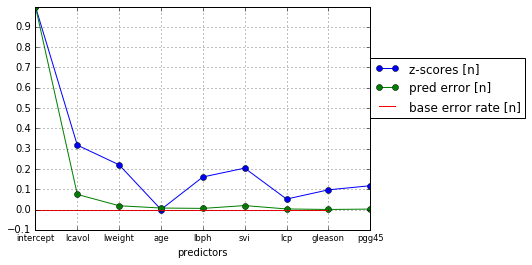

In [172]:
X = data_prostate[:,:8]
X = np.hstack([np.ones((X.shape[0],1)), X])
X = whiten_data(X)
X[:,0] = 0.5
y = data_prostate[:,8].reshape(-1,1)
w_all = np.linalg.inv(X.T @ X) @ X.T @ y
errors_pred_all = math.sqrt(np.sum((X @ w_all - y)**2))/X.shape[0]
print('error:',"%.2f%%" % (errors_pred_all*100))

# variance of predictions
sigma_hat = np.sum((y - X @ w_all)**2) / (X.shape[0]-1)
V = np.linalg.inv(X.T @ X)
z_scores = w_all / (sigma_hat * np.diag(V).reshape(w_all.shape))
z_scores_n = convert_to_unit_range(z_scores)
errors_pred_oneoff = np.zeros((X.shape[1]+1,1))
for ix_col in range(X.shape[1]):
    # compute perf of all predictors w/o this
    ixs_chosen = [ix for ix in range(X.shape[1]) if ix != ix_col]
    X_new = X[:,ixs_chosen]
    w = np.linalg.inv(X_new.T @ X_new) @ X_new.T @ y
    errors_pred_oneoff[ix_col] = math.sqrt(np.sum((X_new @ w - y)**2))/X_new.shape[0]
    
    str_out =  "err: %.2f%%" % (errors_pred_oneoff[ix_col] * 100)
    str_out += " z: %.2f" % (z_scores_n[ix_col])
    print('error w/o', str_predictors[ix_col],'::', str_out)

errors_pred_oneoff[-1] = errors_pred_all
errors_pred_oneoff_n = convert_to_unit_range(errors_pred_oneoff)

plt.plot(z_scores_n, marker='o', label='z-scores [n]')
plt.plot(errors_pred_oneoff_n[:-1], marker='o', label='pred error [n]')
plt.plot((0,7),(errors_pred_oneoff_n[-1],errors_pred_oneoff_n[-1]), label='base error rate [n]')

plt.xticks(range(len(z_scores_n)), [str_predictors[ix] for ix in range(len(z_scores_n))], size='small')
plt.yticks(np.arange(-0.1,1,0.1))
plt.xlabel('predictors')

plt.grid()
plt.legend(loc=(1,0.5))
plt.show()

In [117]:
np.diag(V)

array([ 0.04123711,  0.0219026 ,  0.01513881,  0.01391769,  0.0144275 ,
        0.02037425,  0.03227036,  0.02571761,  0.03097995])

In [103]:
w

array([[ 4.95677376],
       [ 0.67128112],
       [ 0.26322435],
       [-0.15570321],
       [ 0.1412397 ],
       [ 0.31148864],
       [-0.14675945],
       [ 0.1501714 ]])

In [95]:
V

array([[  4.12371134e-02,   1.04942969e-17,  -1.69134633e-17,
         -9.34387763e-18,   9.31048180e-18,  -2.08424318e-18,
         -1.14685773e-17,   4.55500264e-18,   9.70910756e-19],
       [  1.04942969e-17,   2.19026025e-02,  -3.81324565e-03,
         -2.05095891e-03,   1.52158913e-03,  -3.14216433e-03,
         -1.17258677e-02,  -4.43789350e-03,   3.53825774e-03],
       [ -1.69134633e-17,  -3.81324565e-03,   1.51388073e-02,
         -2.85736597e-03,  -5.88859681e-03,  -1.24873460e-03,
         -2.44633131e-05,   2.35545018e-03,   9.52440642e-05],
       [ -9.34387763e-18,  -2.05095891e-03,  -2.85736597e-03,
          1.39176928e-02,  -3.23479162e-03,  -6.61880691e-04,
          3.14914499e-03,  -1.80281951e-03,  -2.72321214e-03],
       [  9.31048180e-18,   1.52158913e-03,  -5.88859681e-03,
         -3.23479162e-03,   1.44274981e-02,   2.57660384e-03,
         -5.64218304e-04,  -6.71736468e-04,  -5.84268059e-04],
       [ -2.08424318e-18,  -3.14216433e-03,  -1.24873460e-03,
   

In [7]:
var2 = np.var(X, axis=0)
print(var2)
var2[var2 < 1e-13] = 1
print(var2)

[  0.00000000e+00   1.37483540e+00   1.81644057e-01   5.48583271e+01
   2.08314048e+00   1.69624827e-01   1.93494631e+00   5.16101605e-01
   7.87266872e+02]
[  1.00000000e+00   1.37483540e+00   1.81644057e-01   5.48583271e+01
   2.08314048e+00   1.69624827e-01   1.93494631e+00   5.16101605e-01
   7.87266872e+02]
